In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Zadanie 3:
Napisz program w Pythonie, który wykorzystuje regresję liniową z scikit-learn do przewidywania cen mieszkań na podstawie danych o ich cechach (np. liczba pokoi, powierzchnia,
piętro, lokalizacja). Dopasuj model do danych treningowych. Ocena modelu na zbiorze testowym za pomocą metryk takich jak średni błąd kwadratowy (MSE) lub współczynnik determinacji (R2
). Zwizualizuj wyniki regresji na wykresie, porównując przewidywane wartości z rzeczywistymi.

In [4]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('data/appartments.csv')

# Sprawdzenie wymiarów DataFrame
print(f" wymiary {df.head()}")

# Typy danych
print(f" typy danych: {df.dtypes}")

# Dane do modelu
X = df[['area', 'rooms', 'floor', 'year_of_construction']]
y = df['price']

 wymiary    area  rooms  floor  year_of_construction   price
0    72      5      5                  1961  576469
1   102      3      2                  1951  326409
2    88      3      5                  2003  596905
3    62      1      1                  1953  647901
4    86      1      1                  2013  585215
 typy danych: area                    int64
rooms                   int64
floor                   int64
year_of_construction    int64
price                   int64
dtype: object


In [6]:
# Tworzenie modelu
model = LinearRegression()

# stwórz x_test z wymiarami takimi jak X które są w zbiorze treningowym
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dopasowanie modelu do danych treningowych
model.fit(X_train, y_train)

# Aby zobaczyć dlaczego jest tak nietypowa zależność między powierzchnią a ceną możemy sprawdzić jego korelację z ceną która jest widocznie negatywna
print(model.coef_)


[-177.63897766 1491.13154449  301.48044966   11.27589798]


In [4]:
# Ocena modelu na zbiorze testowym
print(f"R2: {model.score(X_test, y_test)}")

# Przewidywanie cen mieszkań
y_pred = model.predict(X_test)

# Wizualizacja wyników po area, rooms i price
print(y_test.shape)

R2: -0.00014180022352916488
(2000,)


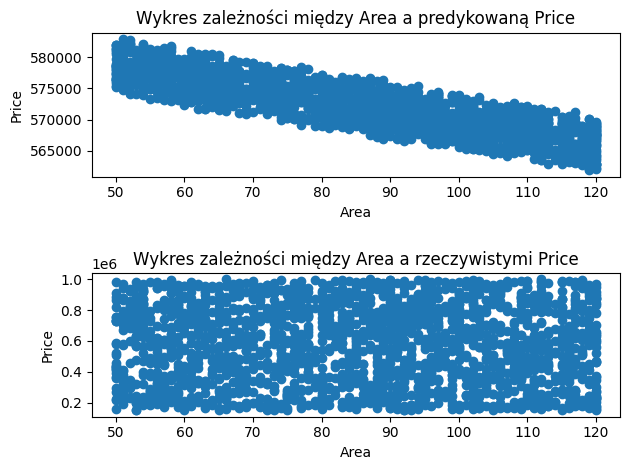

In [5]:

# wykresy
fig, ax = plt.subplots(2)
a_test = X_test['area'].values

ax[0].scatter(a_test, y_pred)
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Price")
ax[0].set_title("Wykres zależności między Area a predykowaną Price")

ax[1].scatter(a_test, y_test)
ax[1].set_xlabel("Area")
ax[1].set_ylabel("Price")
ax[1].set_title("Wykres zależności między Area a rzeczywistymi Price")

plt.tight_layout()
plt.show()

# Wnioski
Model generujący nam dane jest kontrintuicyjny ponieważ zależność między powierzchnią a ceną jest ujemna. Można to łatwo zmienić zmienijąc funkcję generującą dane lub wybierając inny dataset do modelu liniowego.